In [9]:
import torch
import torch.nn as nn
import models
import datasets
import json
import tqdm
from pathlib import Path
import matplotlib.pyplot as plt

In [4]:
test_name = 'resnet_1'
checkpoint = 'epoch_99'

In [71]:
with open('configs/config_enchant_n.json') as f:
    config = json.load(f)
eval_model = getattr(models, config['model_name'])(**config['model_kwargs'])
eval_model.load_state_dict(torch.load(f'logs/{test_name}/checkpoints/{checkpoint}.pt'))
eval_model.eval()
eval_ds = getattr(datasets, config['dataset_name'])(**config['dataset_kwargs'])
print(len(eval_ds))

140


In [72]:
eval_idx = 130

Ground truth: 13
Prediction: tensor([13])
Confidence: tensor([0.9141])


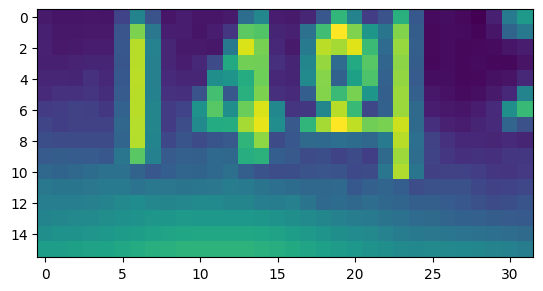

In [106]:
sample = eval_ds[eval_idx]
x = sample[0].unsqueeze(0)
y = sample[1]
with torch.no_grad():
    y_hat = eval_model(x)
plt.imshow(x[0].permute(1,2,0))
print(f'Ground truth: {y}')
print(f'Prediction: {y_hat.argmax(dim=1)}')
print(f'Confidence: {y_hat.softmax(dim=1)[0,y_hat.argmax(dim=1)]}')